In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.rename(columns={'belongs_to_collection': 'belongs-to-collection', 'imdb_id': 'imdb-id', 'original_language': 'original-language', 'original_title': 'original-title', 'poster_path': 'poster-path', 'production_companies': 'production-companies', 'production_countries': 'production-countries', 'release_date': 'release-date', 'spoken_languages': 'spoken-languages'}, inplace=True)
test.rename(columns={'belongs_to_collection': 'belongs-to-collection', 'imdb_id': 'imdb-id', 'original_language': 'original-language', 'original_title': 'original-title', 'poster_path': 'poster-path', 'production_companies': 'production-companies', 'production_countries': 'production-countries', 'release_date': 'release-date', 'spoken_languages': 'spoken-languages'}, inplace=True)

In [3]:
train.head()

,id,belongs-to-collection,budget,genres,homepage,imdb-id,original-language,original-title,overview,popularity,...,release-date,runtime,spoken-languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train.isnull().sum()

id                          0
belongs-to-collection    2396
budget                      0
genres                      7
homepage                 2054
imdb-id                     0
original-language           0
original-title              0
overview                    8
popularity                  0
poster-path                 1
production-companies      156
production-countries       55
release-date                0
runtime                     2
spoken-languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [5]:
test.isnull().sum()

id                          0
belongs-to-collection    3521
budget                      0
genres                     16
homepage                 2978
imdb-id                     0
original-language           0
original-title              0
overview                   14
popularity                  0
poster-path                 1
production-companies      258
production-countries      102
release-date                1
runtime                     4
spoken-languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [6]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


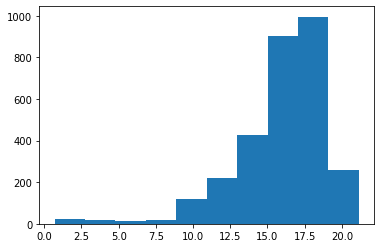

In [7]:
plt.hist(np.log1p(train['revenue']))
plt.show()

In [8]:
train['log-revenue'] = np.log1p(train['revenue']) # and we just predict log-revenue, and take exp

In [9]:
train['has-collection'] = train['belongs-to-collection'].map(lambda x: 1 if pd.notna(x) else 0)
test['has-collection'] = test['belongs-to-collection'].map(lambda x: 1 if pd.notna(x) else 0)


In [10]:
median = train.loc[train['budget'] > 0, 'budget'].median()
train['budget'] = train['budget'].map(lambda x: x if x > 0 else median)
test['budget'] = test['budget'].map(lambda x: x if x > 0 else median)

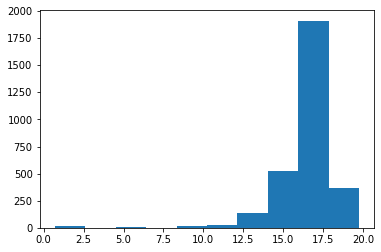

In [11]:
plt.hist(np.log1p(train['budget']))
plt.show()

In [12]:
train['log-budget'] = np.log1p(train['budget'])
test['log-budget'] = np.log1p(test['budget'])

In [13]:
train['genres'] = train['genres'].fillna('[]')
test['genres'] = test['genres'].fillna('[]')

train['genres-count'] = train['genres'].map(lambda x: len(eval(x)))
test['genres-count'] = test['genres'].map(lambda x: len(eval(x)))


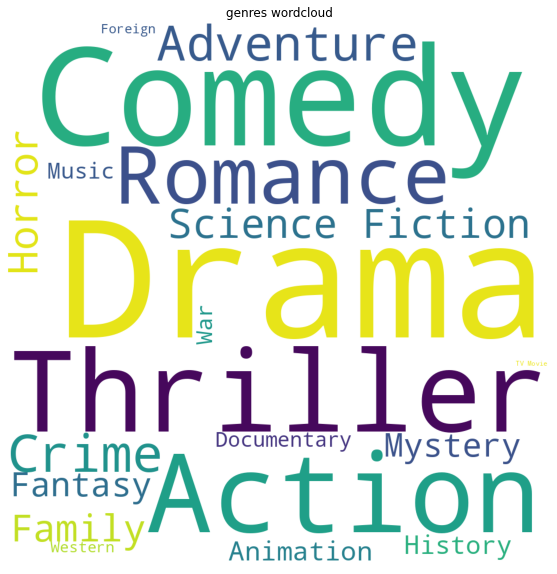

In [14]:
from wordcloud import WordCloud
genres_dict = {}
for val in train['genres']:
    for v in eval(val):
        if v['name'] not in genres_dict.keys():
            genres_dict[v['name']] = 1
        else:
            genres_dict[v['name']] += 1
wc = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(genres_dict)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.title('genres wordcloud')
plt.show()

In [15]:
sorted(genres_dict.items(), key=lambda x: x[1], reverse=True)

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [16]:
from ast import literal_eval
def inJson(val, name):
    for x in literal_eval(val):
        if name == x['name']:
            return 1
    return 0



In [17]:
top_genres_dict = {}
for val in train[['genres', 'revenue']].values:
    x = literal_eval(val[0])
    temp = min(1, len(x))
    for i in range(temp):
        name = x[i]['name']
        if name not in top_genres_dict.keys():
            top_genres_dict[name] = [val[1], 1]
        else:
            top_genres_dict[name][0] += val[1]
            top_genres_dict[name][1] += 1

for x in top_genres_dict.keys():
    top_genres_dict[x] = top_genres_dict[x][0] / top_genres_dict[x][1]


In [18]:
sorted(top_genres_dict.items(), key=lambda x: x[1], reverse=True)

[('Adventure', 187715537.32085562),
 ('Science Fiction', 163833801.36585367),
 ('Family', 157347482.6111111),
 ('Animation', 148089684.90789473),
 ('Action', 93596599.80576923),
 ('Fantasy', 82345105.41176471),
 ('Western', 64905713.538461536),
 ('Thriller', 56574423.54310345),
 ('Romance', 51648567.82089552),
 ('Horror', 49586852.62352941),
 ('Comedy', 47754836.36092715),
 ('Mystery', 47674838.90909091),
 ('History', 44237822.875),
 ('TV Movie', 42000000.0),
 ('Crime', 40820052.02040816),
 ('Drama', 37298750.1133758),
 ('Music', 33890384.55),
 ('War', 24388514.85),
 ('Documentary', 3538249.971830986),
 ('Foreign', 140650.0)]

In [19]:
train['genres-rank'] = train['genres'].map(lambda x: list(top_genres_dict.keys()).index(literal_eval(x)[0]['name']) + 1 if x != '[]' else 0)
test['genres-rank'] = test['genres'].map(lambda x: list(top_genres_dict.keys()).index(literal_eval(x)[0]['name']) + 1 if x != '[]' else 0)

In [20]:
train['has-homepage'] = train['homepage'].map(lambda x: 1 if pd.notna(x) else 0)
test['has-homepage'] = test['homepage'].map(lambda x: 1 if pd.notna(x) else 0)


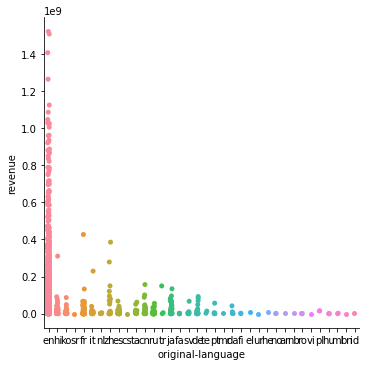

In [21]:
sns.catplot(x='original-language', y='revenue', data=train)

In [22]:
train['originally-english'] = train['original-language'].map(lambda x: 1 if x == 'en' else 0)
test['originally-english'] = test['original-language'].map(lambda x: 1 if x == 'en' else 0)


In [23]:
train.drop(['imdb-id', 'original-title', 'poster-path'], axis=1, inplace=True)
test.drop(['imdb-id', 'original-title', 'poster-path'], axis=1, inplace=True)

In [24]:
train['overview'] = train['overview'].fillna('')
test['overview'] = test['overview'].fillna('')
train['overview-length'] = train['overview'].map(len)
test['overview-length'] = test['overview'].map(len)


(array([135., 783., 695., 701., 382., 126.,  83.,  42.,  30.,  23.]),
 array([   0. ,  100.7,  201.4,  302.1,  402.8,  503.5,  604.2,  704.9,
         805.6,  906.3, 1007. ]),
 <BarContainer object of 10 artists>)

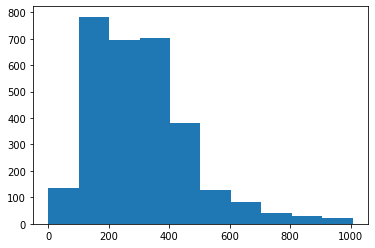

In [25]:
plt.hist(train['overview-length'])

(array([180., 290., 368., 999., 986., 140.,  23.,   6.,   3.,   5.]),
 array([9.99999500e-07, 5.68812620e-01, 1.13762424e+00, 1.70643586e+00,
        2.27524748e+00, 2.84405910e+00, 3.41287072e+00, 3.98168234e+00,
        4.55049396e+00, 5.11930558e+00, 5.68811720e+00]),
 <BarContainer object of 10 artists>)

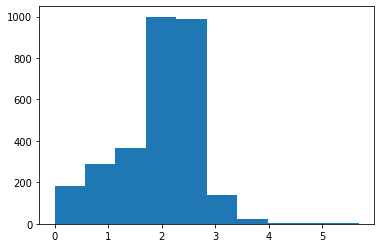

In [26]:
plt.hist(np.log1p(train['popularity']))

In [27]:
train['log-popularity'] = np.log1p(train['popularity'])
test['log-popularity'] = np.log1p(test['popularity'])


In [28]:
train['production-companies'] = train['production-companies'].fillna('[]')
test['production-companies'] = test['production-companies'].fillna('[]')
train['companies-count'] = train['production-companies'].map(lambda x: len(eval(x)))
test['companies-count'] = test['production-companies'].map(lambda x: len(eval(x)))

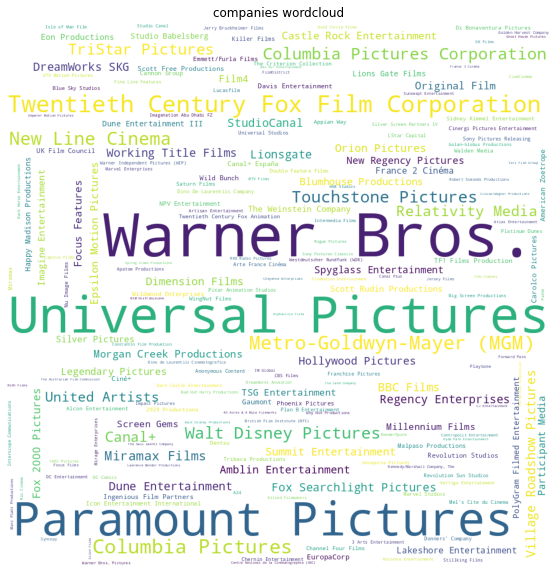

In [29]:
from wordcloud import WordCloud
companies_dict = {}
for val in train['production-companies']:
    for v in eval(val):
        if v['name'] not in companies_dict.keys():
            companies_dict[v['name']] = 1
        else:
            companies_dict[v['name']] += 1
wc = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(companies_dict)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.title('companies wordcloud')
plt.show()

In [30]:
top_companies_dict = {}
for val in train[['production-companies', 'revenue']].values:
    temp = min(3, len(literal_eval(val[0])))
    for i in range(temp):
        name = literal_eval(val[0])[i]['name']
        if name not in top_companies_dict.keys():
            top_companies_dict[name] = [val[1], 1]
        else:
            top_companies_dict[name][0] += val[1]
            top_companies_dict[name][1] += 1
for company in top_companies_dict.keys():
    top_companies_dict[company][0] = top_companies_dict[company][0] / top_companies_dict[company][1]
    top_companies_dict[company] = top_companies_dict[company][0]
    


In [31]:
top_companies_dict = dict(sorted(top_companies_dict.items(), key=lambda x: x[1], reverse=True))

In [32]:
train['companies-rank'] = train['production-companies'].map(lambda x: list(top_companies_dict.keys()).index(literal_eval(x)[0]['name']) + 1 if x != '[]' else 0)
test['companies-rank'] = test['production-companies'].map(lambda x: list(top_companies_dict.keys()).index(literal_eval(x)[0]['name']) + 1 if x != '[]' and literal_eval(x)[0]['name'] in top_companies_dict.keys() else 0)


In [33]:
top_companies = list(top_companies_dict)[:50]
train['top-companies-count'] = train['production-companies'].map(lambda x: inJson(x, top_companies))
test['top-companies-count'] = test['production-companies'].map(lambda x: inJson(x, top_companies))


In [34]:
train['production-countries'] = train['production-countries'].fillna('[]')
test['production-countries'] = test['production-countries'].fillna('[]')

train['countries-count'] = train['production-countries'].map(lambda x: len(literal_eval(x)))
test['countries-count'] = test['production-countries'].map(lambda x: len(literal_eval(x)))


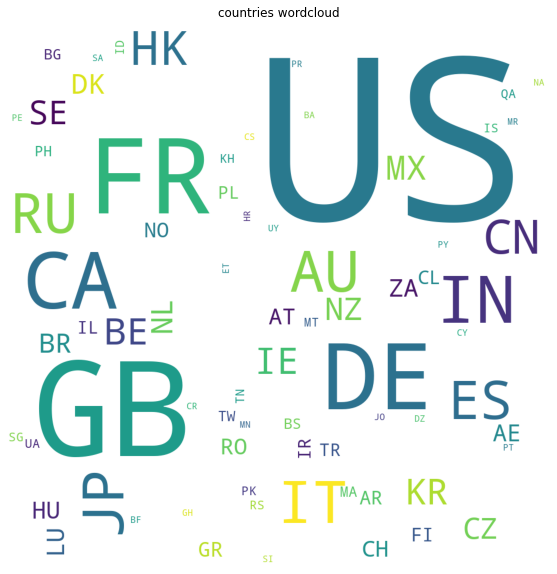

In [35]:
from wordcloud import WordCloud
countries_dict = {}
for val in train['production-countries']:
    for v in eval(val):
        if v['iso_3166_1'] not in countries_dict.keys():
            countries_dict[v['iso_3166_1']] = 1
        else:
            countries_dict[v['iso_3166_1']] += 1
wc = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(countries_dict)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.title('countries wordcloud')
plt.show()

In [36]:
top_countries_dict = {}
for val in train[['production-countries', 'revenue']].values:
    for x in literal_eval(val[0]):
        if x['iso_3166_1'] not in top_countries_dict.keys():
            top_countries_dict[x['iso_3166_1']] = [val[1], 1]
        else:
            top_countries_dict[x['iso_3166_1']][0] += val[1]
            top_countries_dict[x['iso_3166_1']][1] += 1
for top_country in top_countries_dict.keys():
    top_countries_dict[top_country] = top_countries_dict[top_country][0]
top_countries_dict = dict(sorted(top_countries_dict.items(), key=lambda x: x[1], reverse=True))

In [37]:
top_countries_dict

{'US': 187048227401,
 'GB': 27639015794,
 'DE': 12719359779,
 'CA': 9252955680,
 'FR': 8249447774,
 'NZ': 5245506886,
 'AU': 4041396552,
 'JP': 3294365863,
 'CN': 3160045628,
 'HK': 2800993770,
 'IT': 2642404428,
 'CZ': 2286171511,
 'IN': 1902638398,
 'ES': 1654397485,
 'AE': 963490546,
 'RU': 735730439,
 'ZA': 662193142,
 'MX': 645237085,
 'MT': 601276370,
 'IE': 562187384,
 'BE': 549931644,
 'TW': 539971962,
 'PL': 452128851,
 'SI': 419651413,
 'HU': 415618897,
 'IS': 355855544,
 'KR': 296455208,
 'BG': 207155728,
 'AT': 199873861,
 'LU': 194419483,
 'MA': 190719111,
 'TR': 183235845,
 'RO': 178521836,
 'UY': 163794509,
 'PY': 163794509,
 'SE': 160508880,
 'DK': 149340359,
 'BS': 149252232,
 'SG': 131052868,
 'CH': 99958441,
 'KH': 86286687,
 'NL': 83390272,
 'AR': 67192469,
 'GR': 57559512,
 'CL': 49051151,
 'BR': 35910916,
 'TN': 30749038,
 'RS': 29657949,
 'HR': 28400000,
 'FI': 27331973,
 'IL': 20377183,
 'PK': 19574006,
 'PE': 16756372,
 'PT': 15530077,
 'NO': 10651591,
 'UA': 1

In [38]:
def inCountry(x):
    for val in literal_eval(x):
        if val['iso_3166_1'] == 'US':
            return 1
    return 0

train['usa-produced'] = train['production-countries'].map(lambda x: inCountry(x))
test['usa-produced'] = test['production-countries'].map(lambda x: inCountry(x))


In [39]:
test.loc[test['release-date'].isnull(), 'release-date'] = '5/1/00'

In [40]:
train['release-date'] = train['release-date'].map(lambda x: pd.to_datetime(x))
train['year'] = train['release-date'].map(lambda x: x.year)
train['month'] = train['release-date'].map(lambda x: x.month)
train['day'] = train['release-date'].map(lambda x: x.day)
train['dayofweek'] = train['release-date'].map(lambda x: x.dayofweek + 1)
train['weekofyear'] = train['release-date'].map(lambda x: x.weekofyear)
train['quarter'] = train['release-date'].map(lambda x: x.quarter)
test['release-date'] = test['release-date'].map(lambda x: pd.to_datetime(x))
test['year'] = test['release-date'].map(lambda x: x.year)
test['month'] = test['release-date'].map(lambda x: x.month)
test['day'] = test['release-date'].map(lambda x: x.day)
test['dayofweek'] = test['release-date'].map(lambda x: x.dayofweek + 1)
test['weekofyear'] = test['release-date'].map(lambda x: x.weekofyear)
test['quarter'] = test['release-date'].map(lambda x: x.quarter)

train['year'] = train['year'].map(lambda x: x - 100 if x >= 2018 else x)
test['year'] = test['year'].map(lambda x: x - 100 if x >= 2018 else x)

In [41]:
train.drop(train['runtime'].argmax(), inplace=True)

In [42]:
train['runtime'].interpolate(method='values', inplace=True)
test['runtime'].interpolate(method='values', inplace=True)

(array([1.300e+01, 2.000e+00, 2.500e+01, 1.138e+03, 1.258e+03, 4.220e+02,
        1.040e+02, 2.900e+01, 7.000e+00, 1.000e+00]),
 array([  0. ,  24.8,  49.6,  74.4,  99.2, 124. , 148.8, 173.6, 198.4,
        223.2, 248. ]),
 <BarContainer object of 10 artists>)

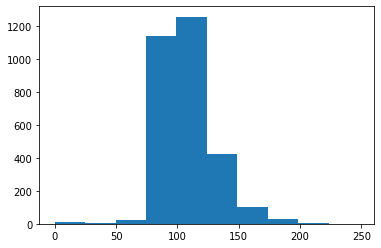

In [43]:
plt.hist(train['runtime'])

In [44]:
train['spoken-languages'] = train['spoken-languages'].fillna('[]')
test['spoken-languages'] = test['spoken-languages'].fillna('[]')

train['spoken-languages-count'] = train['spoken-languages'].map(lambda x: len(literal_eval(x)))
test['spoken-languages-count'] = test['spoken-languages'].map(lambda x: len(literal_eval(x)))

In [45]:
train['spoken-english'] = train['spoken-languages'].map(lambda x: inJson(x, 'English'))
test['spoken-english'] = test['spoken-languages'].map(lambda x: inJson(x, 'English'))

In [46]:
train.drop('status', axis=1, inplace=True)
test.drop('status', axis=1, inplace=True)

In [47]:

train['has-tagline'] = train['tagline'].map(lambda x: 1 if pd.notnull(x) else 0)
test['has-tagline'] = test['tagline'].map(lambda x: 1 if pd.notnull(x) else 0)

train['tagline'] = train['tagline'].fillna('')
test['tagline'] = test['tagline'].fillna('')

In [48]:
train['title'] = train['title'].fillna('')
test['title'] = test['title'].fillna('')
train['title-length'] = train['title'].map(lambda x: len(x))
test['title-length'] = test['title'].map(lambda x: len(x))


In [49]:
train['has-keywords'] = train['Keywords'].map(lambda x: 1 if pd.notnull(x) else 0)
test['has-keywords'] = test['Keywords'].map(lambda x: 1 if pd.notnull(x) else 0)
train['Keywords'] = train['Keywords'].fillna('')
test['Keywords'] = test['Keywords'].fillna('')

In [50]:
train['cast'] = train['cast'].fillna('[]')
test['cast'] = test['cast'].fillna('[]')
train['cast-count'] = train['cast'].map(lambda x: len(literal_eval(x)))
test['cast-count'] = test['cast'].map(lambda x: len(literal_eval(x)))
train['log-cast-count'] = np.log1p(train['cast-count'])
test['log-cast-count'] = np.log1p(test['cast-count'])


(array([  26.,   16.,   31.,  185.,  577., 1075.,  684.,  277.,  101.,
          27.]),
 array([0.        , 0.50562458, 1.01124916, 1.51687374, 2.02249832,
        2.5281229 , 3.03374748, 3.53937206, 4.04499664, 4.55062122,
        5.05624581]),
 <BarContainer object of 10 artists>)

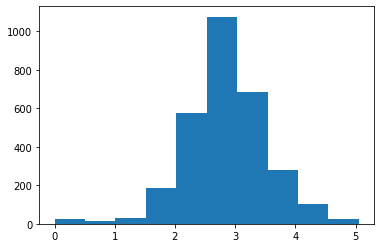

In [51]:
plt.hist(np.log1p(train['cast-count']))

In [52]:
actors_dict = {}
for element in train[['cast', 'revenue']].values:
    temp = min(5, len(literal_eval(element[0])))
    for i in range(temp):
        name = literal_eval(element[0])[i]['name']
        if name not in actors_dict:
            actors_dict[name] = [element[1], 1]
        else:
            actors_dict[name][0] += element[1]
            actors_dict[name][1] += 1
actors_dict = {k: v for k, v in actors_dict.items() if v[1] >= 5}
for actor in actors_dict:
    actors_dict[actor] = actors_dict[actor][0] / actors_dict[actor][1]

In [53]:
sorted(actors_dict.items(), key=lambda x: x[1], reverse=True)

[('Tyrese Gibson', 643678711.6),
 ('Ian McKellen', 585298204.875),
 ('Emma Watson', 579056739.0),
 ('Chris Hemsworth', 521686952.1666667),
 ('Chris Evans', 465336451.6666667),
 ('Orlando Bloom', 450570885.375),
 ('Megan Fox', 411813835.0),
 ('Shia LaBeouf', 409059041.3),
 ('Vin Diesel', 403237367.3),
 ('Josh Duhamel', 388336592.1111111),
 ('Hayden Christensen', 359219191.6),
 ('Mark Ruffalo', 348523404.3),
 ('Scarlett Johansson', 314240111.64285713),
 ('Anne Hathaway', 311294146.71428573),
 ('Sharlto Copley', 307427688.0),
 ('Frances McDormand', 306671857.6666667),
 ('Simon Pegg', 304443721.4285714),
 ('Elijah Wood', 297430093.5),
 ('Ken Jeong', 295094661.5),
 ('Queen Latifah', 292738983.125),
 ('Paul Walker', 292241853.125),
 ('Johnny Depp', 288573267.3125),
 ('Robert Pattinson', 285498366.4),
 ('Laura Dern', 284156771.2),
 ('Kristen Stewart', 282323823.6),
 ('Daniel Craig', 277392845.45454544),
 ('Ian McShane', 275549764.4),
 ('Jack Black', 274264298.4),
 ('Cate Blanchett', 260901734

In [54]:
lead_actors_dict = {}
for element in train[['cast', 'revenue']].values:
    temp = min(1, len(literal_eval(element[0])))
    for i in range(temp):
        name = literal_eval(element[0])[i]['name']
        if name not in lead_actors_dict:
            lead_actors_dict[name] = [element[1], 1]
        else:
            lead_actors_dict[name][0] += element[1]
            lead_actors_dict[name][1] += 1
lead_actors_dict = {k: v for k, v in lead_actors_dict.items() if v[1] >= 5}
for actor in lead_actors_dict:
    lead_actors_dict[actor] = lead_actors_dict[actor][0] / lead_actors_dict[actor][1]

In [55]:
sorted(lead_actors_dict.items(), key=lambda x: x[1], reverse=True)

[('Robert Downey Jr.', 531838522.8333333),
 ('Shia LaBeouf', 489428383.5),
 ('Elijah Wood', 440953864.4),
 ('Vin Diesel', 362724163.0),
 ('Hugh Jackman', 331559375.6),
 ('Daniel Craig', 326010693.0),
 ('Tom Cruise', 267587944.5),
 ('Johnny Depp', 260574218.5),
 ('Christian Bale', 233586861.8888889),
 ('Harrison Ford', 228516060.0909091),
 ('Julia Roberts', 204407270.0),
 ('Tom Hanks', 199628364.33333334),
 ('Jim Carrey', 196064719.1),
 ('Brad Pitt', 192769702.5),
 ('Pierce Brosnan', 190816996.8888889),
 ('Adam Sandler', 180198717.1111111),
 ('Bradley Cooper', 177532136.2),
 ('Ben Stiller', 173917022.83333334),
 ('Mark Wahlberg', 173337006.2142857),
 ('Owen Wilson', 166883459.46153846),
 ('Matt Damon', 162861065.0),
 ('Sandra Bullock', 161314661.875),
 ('Ewan McGregor', 159628369.8),
 ('Naomi Watts', 156058484.0),
 ('Milla Jovovich', 150000847.125),
 ('Kevin Costner', 147564130.375),
 ('Arnold Schwarzenegger', 145819196.58333334),
 ('Michael J. Fox', 143034615.85714287),
 ('Dwayne Johns

In [56]:
train['cast'] = train['cast'].fillna('[]')
test['cast'] = test['cast'].fillna('[]')

train['top-cast-count'] = train['cast'].map(lambda x: inJson(x, actors_dict))
test['top-cast-count'] = test['cast'].map(lambda x: inJson(x, actors_dict))

train['lead-cast-count'] = train['cast'].map(lambda x: inJson(x, lead_actors_dict))
test['lead-cast-count'] = test['cast'].map(lambda x: inJson(x, lead_actors_dict))

In [57]:
train['crew'] = train['crew'].fillna('[]')
test['crew'] = test['crew'].fillna('[]')

train['crew-count'] = train['crew'].map(lambda x: len(literal_eval(x)))
test['crew-count'] = test['crew'].map(lambda x: len(literal_eval(x)))


(array([ 16.,  64., 305., 352., 581., 732., 423., 261., 199.,  66.]),
 array([0.        , 0.52729996, 1.05459991, 1.58189987, 2.10919982,
        2.63649978, 3.16379974, 3.69109969, 4.21839965, 4.7456996 ,
        5.27299956]),
 <BarContainer object of 10 artists>)

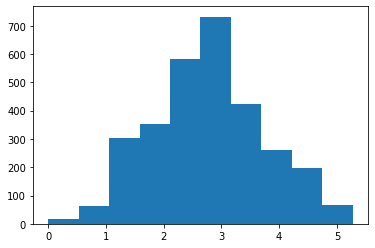

In [58]:
plt.hist(np.log1p(train['crew-count']))

In [59]:
train['log-crew-count'] = np.log1p(train['crew-count'])
test['log-crew-count'] = np.log1p(test['crew-count'])


In [60]:
def getDirectorNum(val):
    cnt = 0
    for x in literal_eval(val):
        if x['job'] == 'Director':
            cnt += 1
    return cnt
train['directors-count'] = train['crew'].map(getDirectorNum)
test['directors-count'] = test['crew'].map(getDirectorNum)

In [61]:
lead_directors_dict = {}
for val in train[['crew', 'revenue']].values:
    if val[0] == '[]':
        continue
    x = literal_eval(val[0])
    for i in range(len(x)):
        if x[i]['job'] == 'Director':
            name = x[i]['name']
            if name not in lead_directors_dict.keys():
                lead_directors_dict[name] = [val[1], 1]
            else:
                lead_directors_dict[name][0] += val[1]
                lead_directors_dict[name][1] += 1
            continue
lead_directors_dict = {i: v for i, v in lead_directors_dict.items() if v[1] >= 5}

for name in lead_directors_dict.keys():
    lead_directors_dict[name] = lead_directors_dict[name][0] / lead_directors_dict[name][1]

In [62]:
top_directors_dict = {}
for val in train[['crew', 'revenue']].values:
    v = literal_eval(val[0])
    for x in v:
        if x['job'] == 'Director':
            name = x['name']
            if name not in top_directors_dict.keys():
                top_directors_dict[name] = [val[1], 1]
            else:
                top_directors_dict[name][0] += val[1]
                top_directors_dict[name][1] += 1
top_directors_dict = {i: v for i, v in top_directors_dict.items() if v[1] >= 5}

for name in top_directors_dict.keys():
    top_directors_dict[name] = top_directors_dict[name][0] / top_directors_dict[name][1]


In [63]:
lead_directors = dict(sorted(lead_directors_dict.items(), key=lambda x: x[1], reverse=True)[:30])
top_directors = dict(sorted(top_directors_dict.items(), key=lambda x: x[1], reverse=True))

In [64]:
def countDirector(val, dic):
    cnt = 0
    for x in literal_eval(val):
        if x['job'] == 'Director' and x['name'] in dic:
            cnt += 1
    return cnt
def checkDirector(val, dic):
    for x in literal_eval(val):
        if x['job'] == 'Director' and x['name'] in dic:
            return 1
    return 0

train['top-directors-count'] = train['crew'].map(lambda x: countDirector(x, top_directors))
train['has-lead-director'] = train['crew'].map(lambda x: checkDirector(x, lead_directors))
test['top-directors-count'] = test['crew'].map(lambda x: countDirector(x, top_directors))
test['has-lead-director'] = test['crew'].map(lambda x: checkDirector(x, lead_directors))


In [68]:
train['budget-year-ratio'] = train.apply(lambda x: x['budget'] / x['year'], axis=1)
test['budget-year-ratio'] = test.apply(lambda x: x['budget'] / x['year'], axis=1)
train['budget-cast-ratio'] = train.apply(lambda x: x['budget'] / x['cast-count'] if x['cast-count'] != 0 else 0, axis=1)
test['budget-cast-ratio'] = test.apply(lambda x: x['budget'] / x['cast-count'] if x['cast-count'] != 0 else 0, axis=1)
train['budget-topcast-ratio'] = train.apply(lambda x: x['budget'] / x['top-cast-count'] if x['top-cast-count'] != 0 else 0, axis=1)
test['budget-topcast-ratio'] = test.apply(lambda x: x['budget'] / x['top-cast-count'] if x['top-cast-count'] != 0 else 0, axis=1)
train['budget-leadcast-ratio'] = train.apply(lambda x: x['budget'] / x['lead-cast-count'] if x['lead-cast-count'] != 0 else 0, axis=1)
test['budget-leadcast-ratio'] = test.apply(lambda x: x['budget'] / x['lead-cast-count'] if x['lead-cast-count'] != 0 else 0, axis=1)


In [69]:
feature_names = ['log-budget', 'has-collection', 'log-popularity', 
                 'runtime', 'genres-count', 'genres-rank', 'has-homepage', 'originally-english', 
                 'overview-length', 'companies-count', 'companies-rank', 'top-companies-count', 
                'countries-count', 'usa-produced', 'year', 'month', 'day', 
                'dayofweek', 'weekofyear', 'quarter', 'spoken-languages-count', 'spoken-english', 
                'has-tagline', 'title-length', 'has-keywords', 'log-cast-count', 'top-cast-count', 
                'lead-cast-count', 'crew-count', 'log-crew-count', 'directors-count', 
                'top-directors-count', 'has-lead-director', 'budget-year-ratio', 'budget-cast-ratio',
                'budget-topcast-ratio', 'budget-leadcast-ratio']


In [108]:
train_x = train[feature_names]
train_y = train['log-revenue']
test_x = test[feature_names]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y.values, test_size=0.15, random_state=42)

In [114]:
# from sklearn.neighbors import KNeighborsRegressor
# regressor = KNeighborsRegressor()

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
mse

GradientBoostingRegressor(random_state=42)

In [115]:
pred = regressor.predict(test_x)
pred = np.expm1(pred).astype(int)
df = pd.DataFrame(pred.T, columns=['revenue'])
df.insert(0, 'id', test['id'])
df
df.to_csv('submission0303_1.csv', index=False)

2.750299039624964

In [127]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
mse

5.1239228459191235

In [123]:
pred = regressor.predict(test_x)
pred = np.expm1(pred).astype(int)
df = pd.DataFrame(pred.T, columns=['revenue'])
df.insert(0, 'id', test['id'])
df
df.to_csv('submission0303_3.csv', index=False)